In [40]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import torch

import REINFORCE as rln

In [41]:
importlib.reload(rln)

reinforce = rln.REINFORCE()

In [42]:
n_trs = 10
obs, rewards, actions, probs, log_probs, values, store_trial_begin, gt = reinforce.experience(n_trs)

In [39]:
#torch.autograd.set_detect_anomaly(True)
for i in range(10):
    reinforce.learning(n_trs, 0.4)
    

In [43]:
reinforce.learning(n_trs, 0.4)

It took 3.243139s for 10 trials


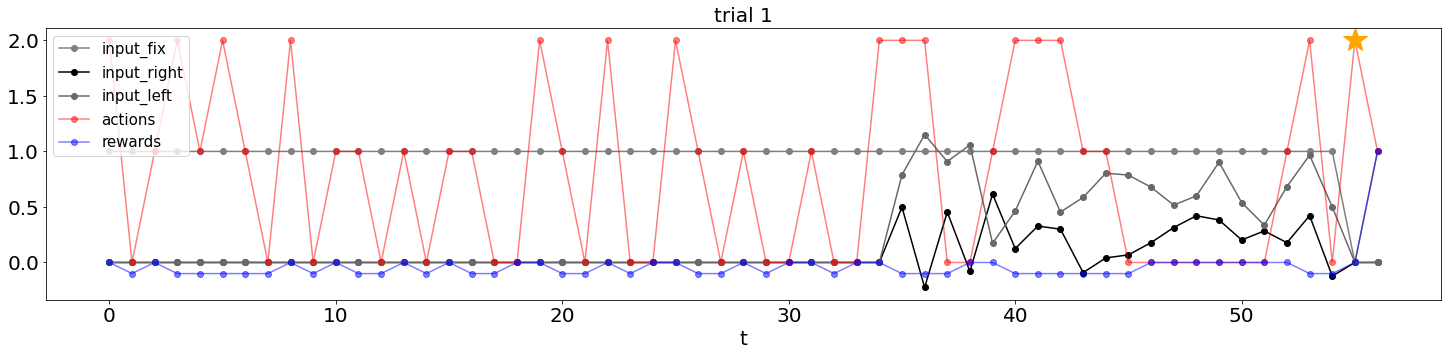

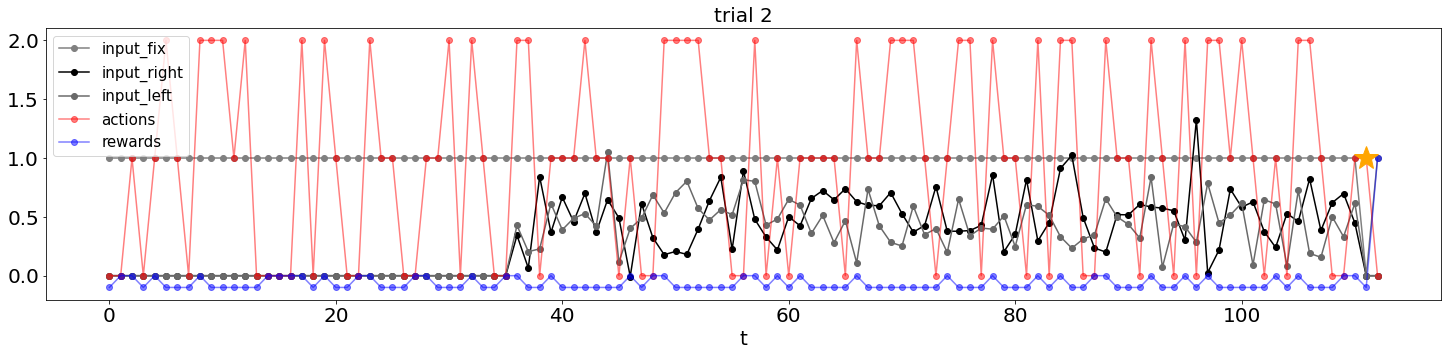

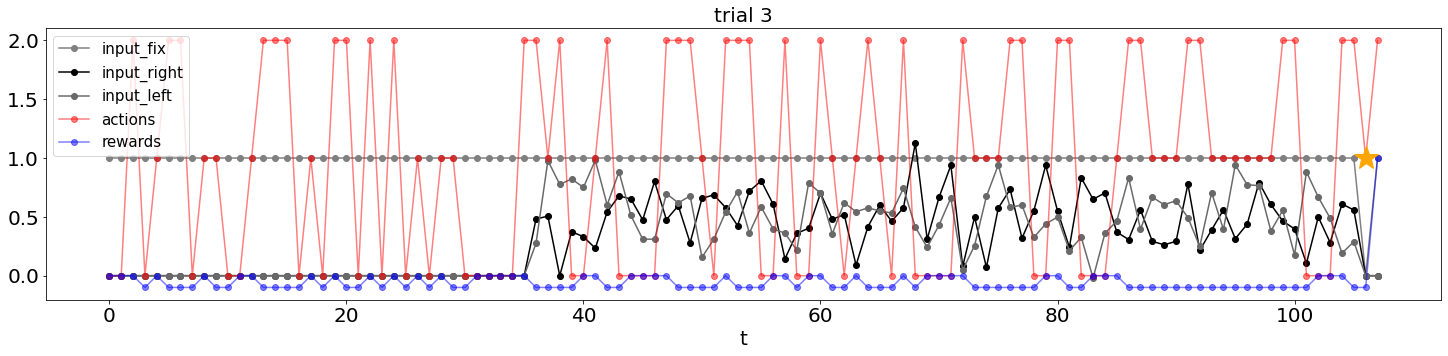

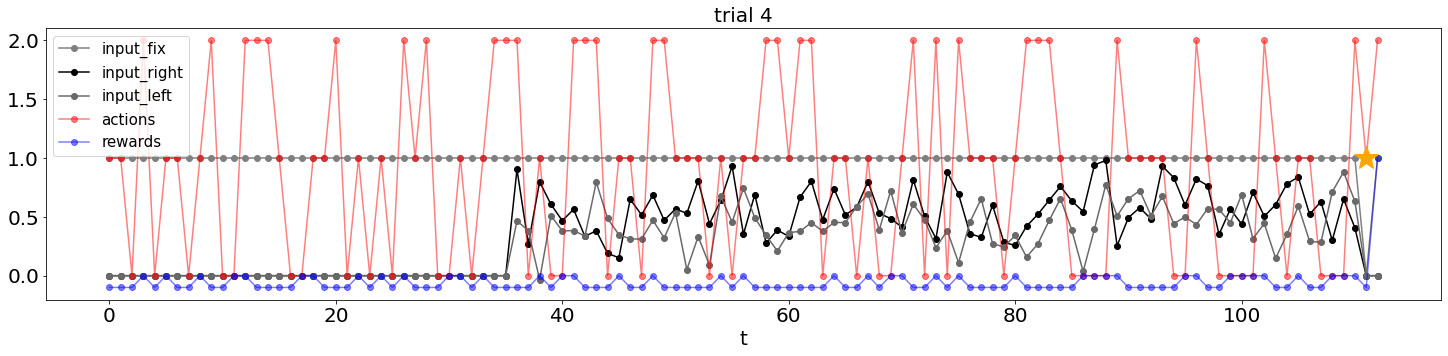

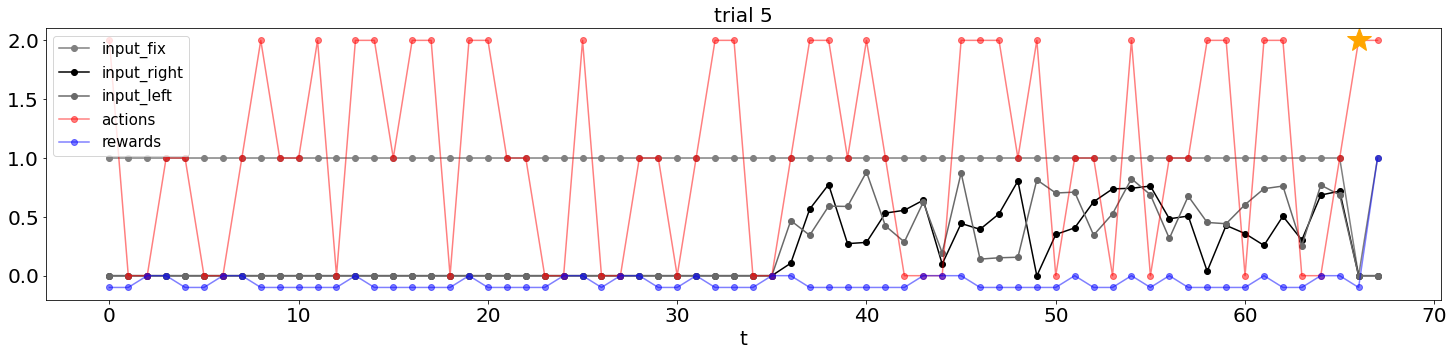

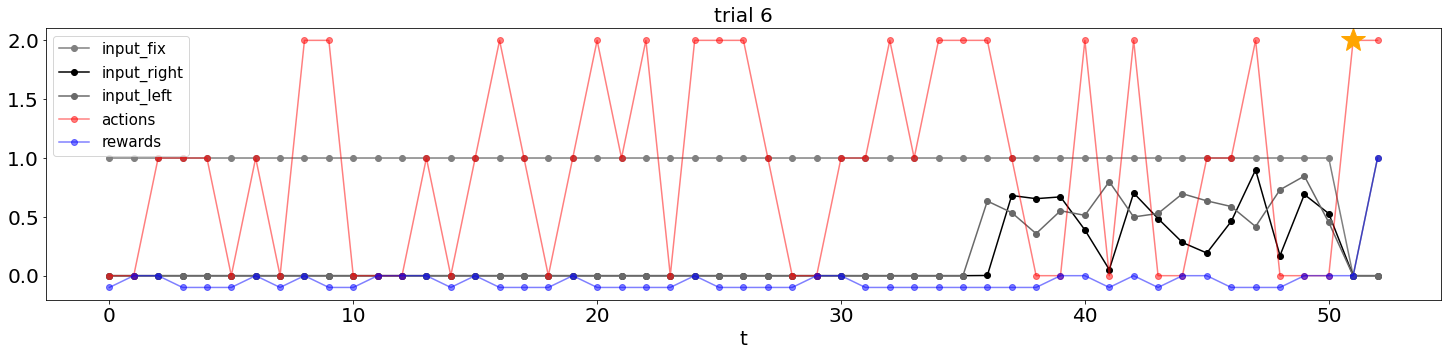

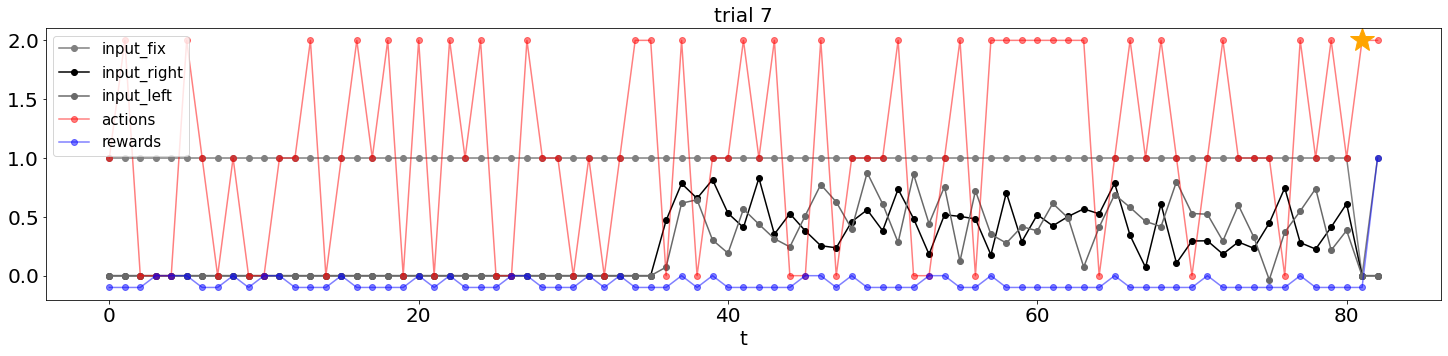

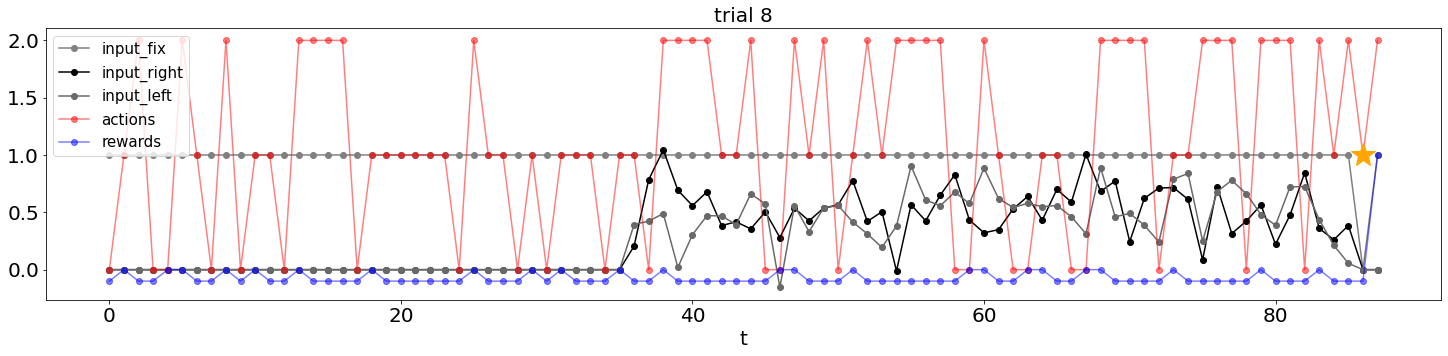

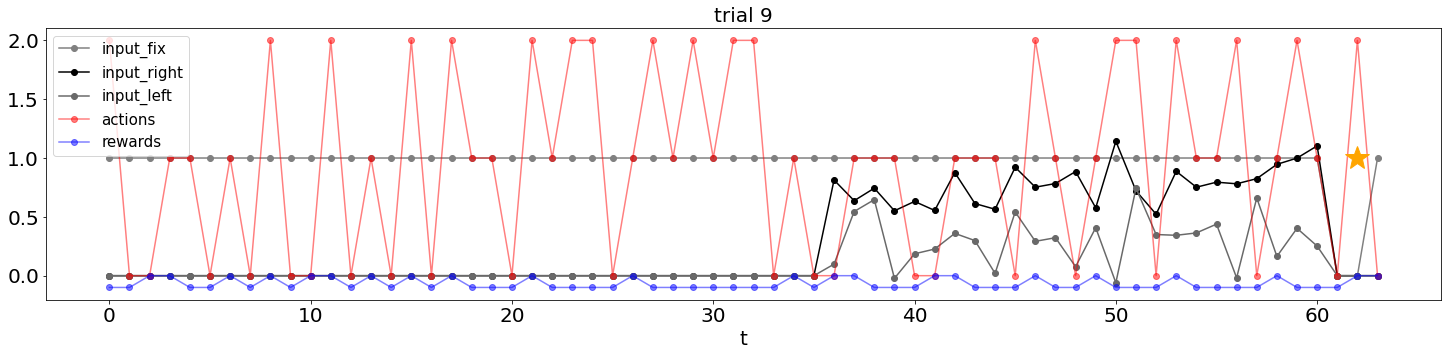

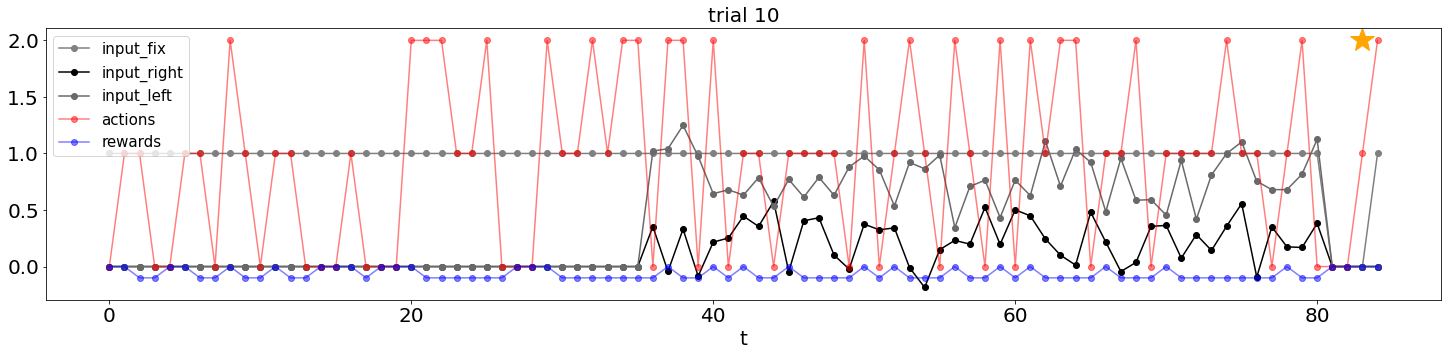

In [44]:
obs = obs.T
length = 0
for i in range(n_trs):

    plt.figure(figsize=(25,5))
    
    start = int(store_trial_begin[i])
    stop = int(store_trial_begin[i+1])
     
    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="black")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="dimgray")
    plt.plot(actions[start:stop], "-o", label="actions", color="red", alpha=0.5)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="blue", alpha=0.5)
    plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    plt.legend(fontsize=15, loc="upper left");